<a href="https://colab.research.google.com/github/nedokormysh/GB_DA_algorithms/blob/lesson3/DA_algorithms_hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [ ]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [ ]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [ ]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [ ]:
X_st1 = X.copy()
X_st1[2, :]

array([ 500.,  700.,  750.,  600., 1450.,  800., 1500., 2000.,  450.,
       1000.])

In [ ]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [ ]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [ ]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [ ]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

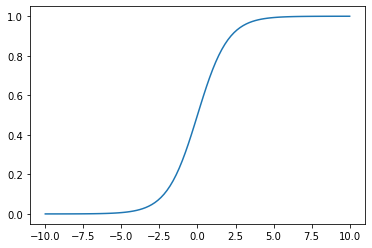

In [ ]:
z = np.linspace(-10, 10, 101)

probabilities = sigmoid(z)

plt.plot(z, probabilities)
plt.show()

In [ ]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

**Задание 1.**

Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

Будем подавать не ноль, не допуская ошибок в вычислении программы, а некое малое число.

In [ ]:
def calc_logloss_x(y, y_pred):
    # y_pred = [1e-18 if el == 0 else el for el in y_pred] 
    
    y_pred = np.where(y_pred == 0, 1e-18, y_pred)
    # print(y_pred)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

# Задание 2.

Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [ ]:
# alphas = [0.1, 0.01, 0.001, 0.0001,  0.00001]
alphas = np.logspace(-1, -8, 7)

iterations = np.linspace(1e3, 1e4, 5)
iterations

alphas = np.logspace(-2, -8, 7)

In [ ]:
# потребуется возвращать и ошибки
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            # print(i, W, err)
            pass
    return W, err

In [ ]:
iterations = np.linspace(1e3, 1e4, 5)
alphas = np.logspace(-1, -8, 7)

def find_log_loss_min(alphas, iterations, visual=False):
  min_err = np.inf
  weights = 0

  for al in alphas:
    for it in iterations:    
      non, err = eval_model(X_st, y, iterations=int(it), alpha=al)
      if visual == True:
        print(f'При alpha: {al} и количестве итераций iterations: {it} logloss = {err}')
      if err < min_err:
        min_err = err
        weights = (it, al)

  print(f'\nМинимальное значение LogLoss {round(min_err, 4)} достигается при значениях iterations = {weights[0]} и alpha = {weights[1]}')

find_log_loss_min(alphas, iterations, visual=True)

При alpha: 0.1 и количестве итераций iterations: 1000.0 logloss = 0.3754024229306204
При alpha: 0.1 и количестве итераций iterations: 3250.0 logloss = 0.2949696719697402
При alpha: 0.1 и количестве итераций iterations: 5500.0 logloss = 0.2645247287370077
При alpha: 0.1 и количестве итераций iterations: 7750.0 logloss = 0.24591559530770243
При alpha: 0.1 и количестве итераций iterations: 10000.0 logloss = 0.23214418399379286
При alpha: 0.006812920690579608 и количестве итераций iterations: 1000.0 logloss = 0.48482880702859427
При alpha: 0.006812920690579608 и количестве итераций iterations: 3250.0 logloss = 0.4537045732305686
При alpha: 0.006812920690579608 и количестве итераций iterations: 5500.0 logloss = 0.4325185673573489
При alpha: 0.006812920690579608 и количестве итераций iterations: 7750.0 logloss = 0.4152309297039424
При alpha: 0.006812920690579608 и количестве итераций iterations: 10000.0 logloss = 0.40042629599220875
При alpha: 0.00046415888336127773 и количестве итераций ite

# Задание 3.

Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.

In [ ]:
def calc_pred_proba(X, W):
    z = np.dot(X, W)
    # y_pred_proba = 1 / (1 + np.exp(-z))
    y_pred_proba = sigmoid(z)
    return y_pred_proba

In [ ]:
W = eval_model(X_st, y, iterations=10000, alpha=0.1)[0]
calc_pred_proba(W, X_st)

array([0.34909794, 0.16499718, 0.99721038, 0.00128184, 0.73112245,
       0.32370941, 0.99918939, 0.0911856 , 0.40772414, 0.99034837])

# Задание 4.

Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.

In [ ]:
def calc_pred(X, W, threshold=0.5):
    y_pred_proba = calc_pred_proba(X, W)
    y_pred = np.where(y_pred_proba > threshold, 1, 0)
    # y_pred = [1 if x > 0.5 else 0 for x in y_pred_proba] 
    return y_pred

In [ ]:
y_pred = calc_pred(W, X_st)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [ ]:
# y_pred = calc_pred(X_st, eval_model(X_st, y, iterations=10000, alpha=0.03))
# y_pred

# Задание 5.

Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [ ]:
def accuracy(y_true, y_pred):
    acc = (y_pred == y_true).mean()
    return acc

In [ ]:
accuracy(y, y_pred)

0.9

In [ ]:
def class_error(y_true, y_pred, visual=False):
    TP = (y * y_pred).sum()
    TN = ((y_pred + y) == 0).sum()
    FN = ((y * y_pred) != y).sum()
    FP = ((y * y_pred) != y_pred).sum()

    if(visual):
      print(f'TP = {TP}, TN = {TN}, FN = {FN}, FP = {FP}')

    return TP, TN, FN, FP

def error_matrix(y_true, y_pred):
  TP, TN, FN, FP = class_error(y_true, y_pred, visual=True)
  matrix = np.array([[TP, FP], [FN, TN]])
  return matrix

print(f'\nМатрица ошибок: \n{error_matrix(y, y_pred)}')

TP = 4.0, TN = 5, FN = 1, FP = 0

Матрица ошибок: 
[[4. 0.]
 [1. 5.]]


In [ ]:
def precision(y_true, y_pred):
    TP, TN, FN, FP = class_error(y_true, y_pred)
    return TP / (TP + FP)

print(f'Precision = {precision(y, y_pred)}')

TP = 4.0, TN = 5, FN = 1, FP = 0
Precision = 1.0


In [ ]:
def recall(y_true, y_pred):
    TP, TN, FN, FP = class_error(y_true, y_pred)
    return TP / (TP + FN)

print(f'Recall = {recall(y, y_pred)}')

TP = 4.0, TN = 5, FN = 1, FP = 0
Recall = 0.8


In [ ]:
def f1score(y_true, y_pred):
    p = precision(y, y_pred)    
    r = recall(y, y_pred)    
    return(2 * p * r) / (p + r)

print(f'f1score = {round(f1score(y, y_pred), 4)}')

f1score = 0.8889


# Задание 6.

Могла ли модель переобучиться? Почему?

Модель могла переобучиться. Мы не рассматривали разбиение на обучающую и тестовую выборку. Но мы подбирали гиперпараметры минимизируя ошибку. И модель могла переобучиться на данном количестве примеров. 